<p style="text-align:center;"><span style="font-size:60px;"><span style="color:navy"><span style="font-family:cursive;"><span style="font-weight:1000">Hi Everybody 👋</span></span></span></span></p>

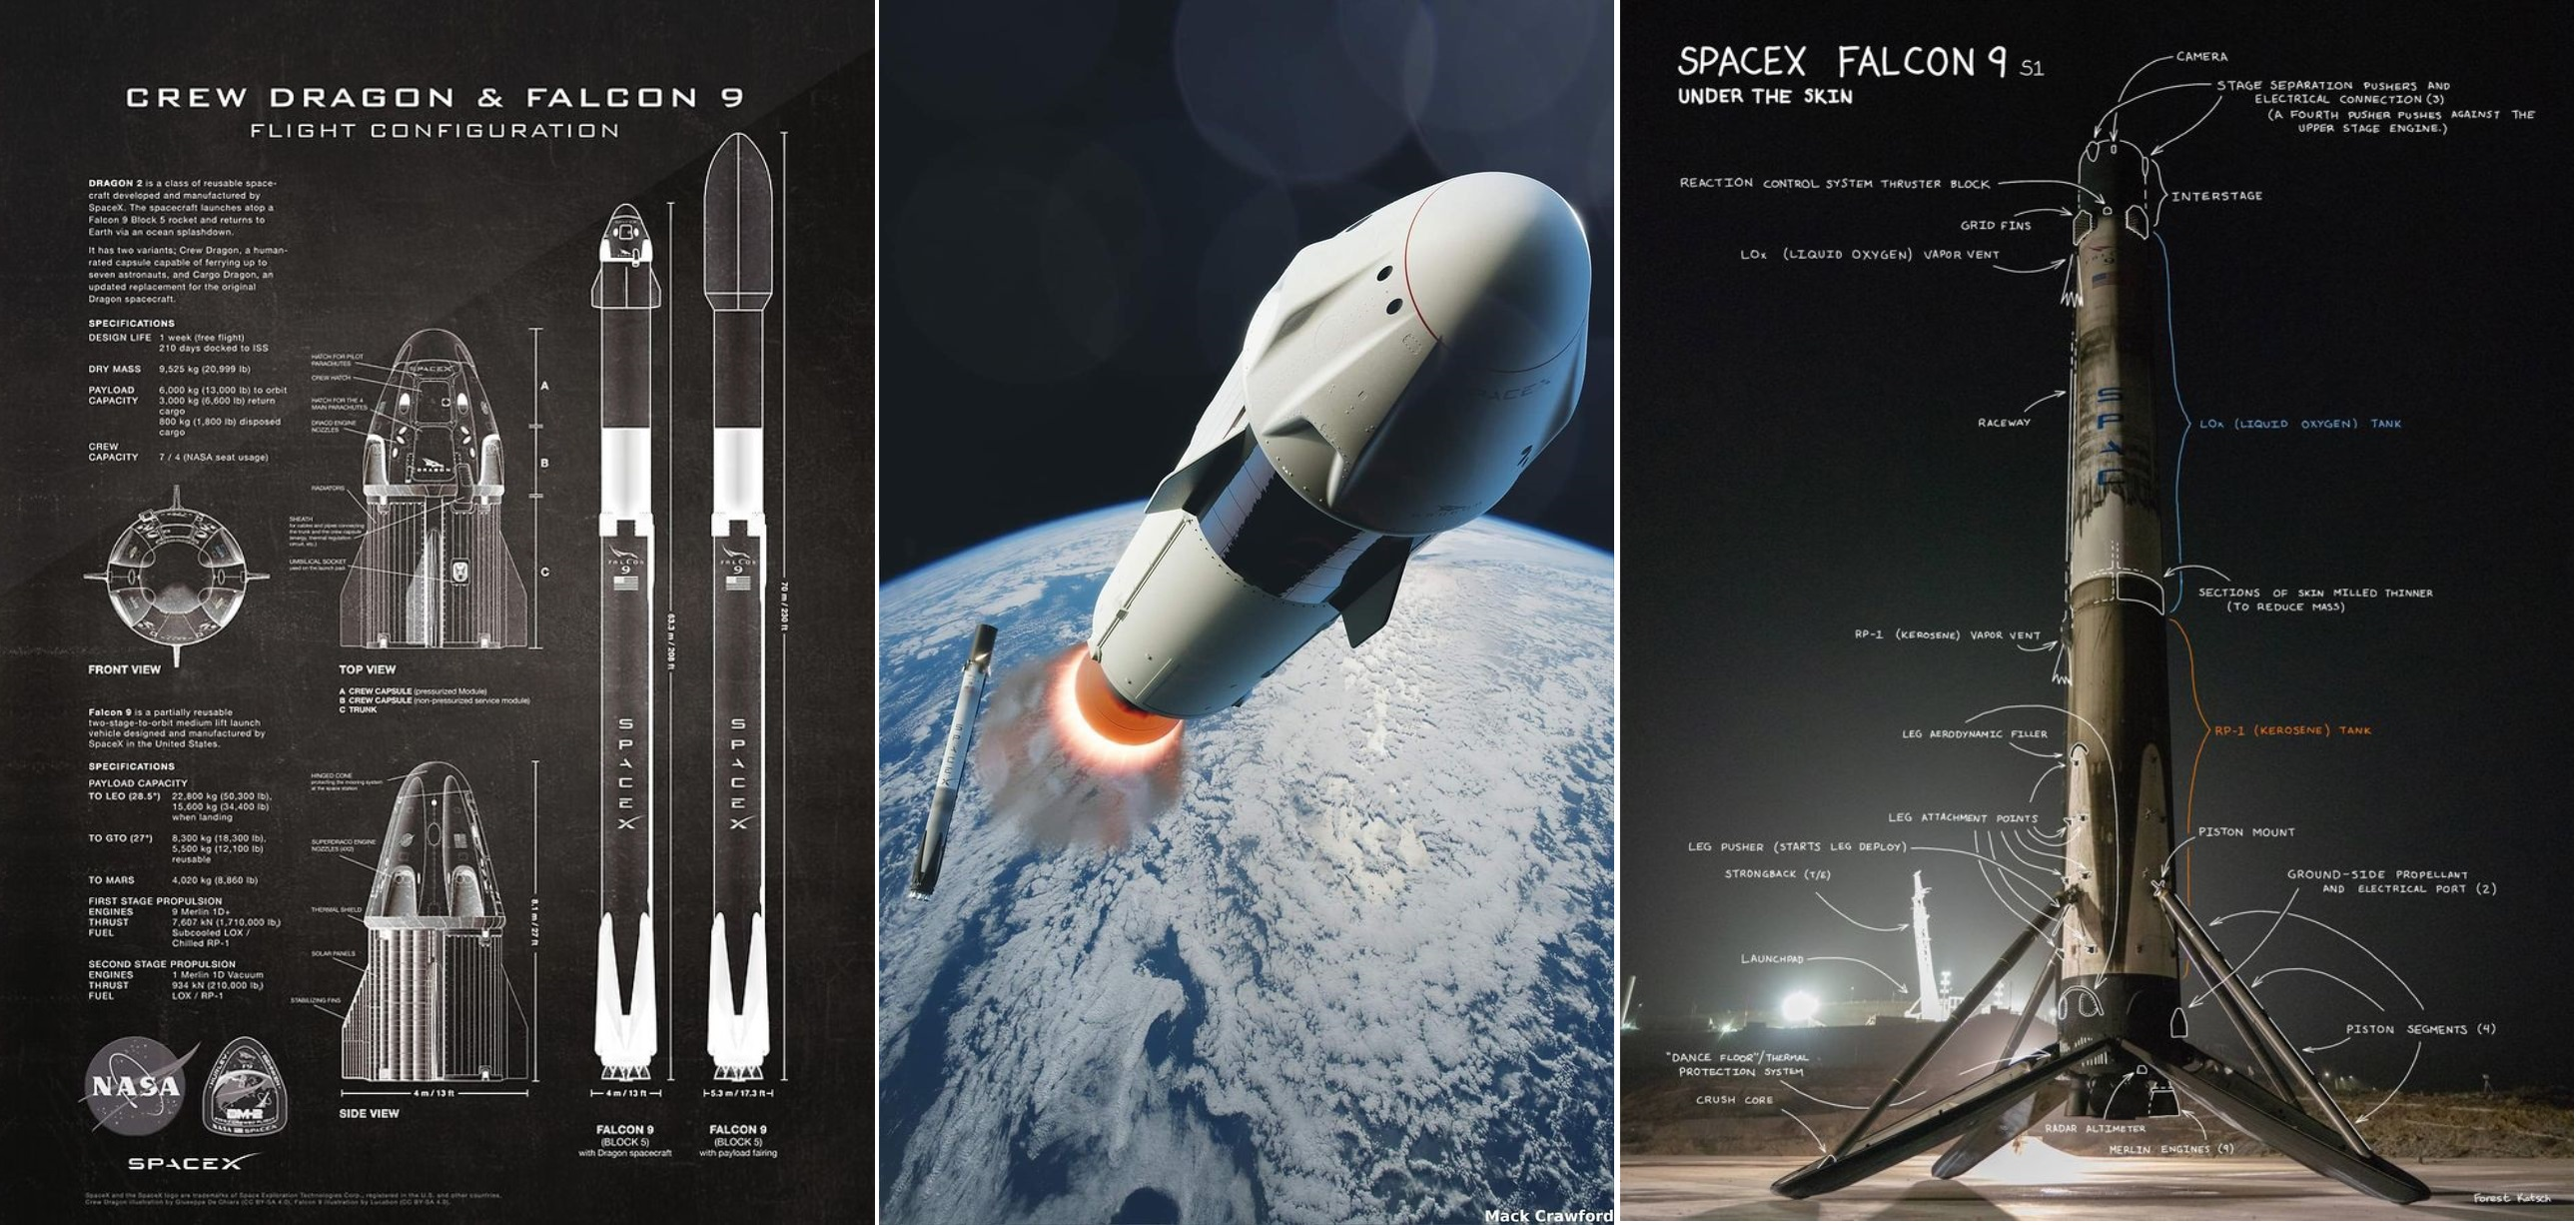

<a id="setup"></a>
# <p style="padding:15px;background-color:black ;margin:0;color:#ffffff;font-family:Chalkduster;font-size:75%;text-align:center;border-radius: 75px 75px;font-weight:700; box-shadow: 10px 10px 5px #32409c">Table Of Content 📚</p>

<a id="content"></a>    
<div style="border-radius:20px; padding: 15px; background-color: #e3e6fa; font-size:100%; text-align:left">

<h2><span style="text-align:center; font-weight:bolder; color:navy">Table of Contents:</span></h2>

 * **[Step 1 | Nessesary Libraries](#setup)**
    -  [1.1 | Import Libraries](#import)
    -  [1.2 | Library configurations](#lib_config)
 *  **[Step 2 | Data](#data)**
    -  [2.1 | Collecting Data](#load_data)
    -  [2.2 | Data purification](#data_pure)
 *  **[Step 3 | Data Wrangling](#data_wrangling)**
    -  [3.1 | Missing Values](#missing)
    -  [3.2 | Data Analysis](#analysis)
    -  [3.3 | Plots](#plots)
    -  [3.4 | One Hot Encoder](#onehot)
    -  [3.5 | Geographic Map](#geomap)
 *  **[Step 4 | Macine Learning](#ml)**
    -  [4.1 | Initializations](#init)
    -  [4.2 | LogisticRegression](#lr)
    -  [4.3 | SVC](#svc)
    -  [4.4 | DecisionTreeClassifier](#tree)
    -  [4.5 | KNeighborsClassifier](#knn)
    -  [4.6 | result](#result)
 *  **[Author](#author)**

<a id="setup"></a>
# <p style="padding:15px;background-color:black ;margin:0;color:#ffffff;font-family:Chalkduster;font-size:75%;text-align:center;border-radius: 75px 75px;font-weight:700; box-shadow: 10px 10px 5px #32409c">Step 1 | Nessasary Libraries 📚</p>

<a id="import"></a>
# <b><span style="color:#0266b7">Step 1.1 | </span><span style="color:#ff6200">Import Libraries</span></b>

In [1]:
import pandas as pd              # Pandas
import matplotlib.pyplot as plt  # Matplotlib
import seaborn as sns            # Seaborn
import warnings                  # Warnings
import numpy as np               # Numpy
# import zipcodes as zcode         # Zipcodes
import folium                    # Folium
import requests                  # Requests
import datetime                  # DateTime

################### Sklearn ####################################
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing

# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split

# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV

# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression

# Support Vector Machine classification algorithm
from sklearn.svm import SVC

# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier

# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

<a id="lib_config"></a>
# <b><span style="color:#0266b7">Step 1.2 | </span><span style="color:#ff6200">Library configurations</span></b>

In [2]:
pd.options.mode.copy_on_write = True # Allow re-write on variable
sns.set_style('darkgrid') # Seaborn style
warnings.filterwarnings('ignore') # Ignore warnings
pd.set_option('display.max_columns', None) # Setting this option will print all collumns of a dataframe
pd.set_option('display.max_colwidth', None) # Setting this option will print all of the data in a feature

<a id="data"></a>
# <p style="padding:15px;background-color:black ;margin:0;color:#ffffff;font-family:Chalkduster;font-size:75%;text-align:center;border-radius: 75px 75px;font-weight:700; box-shadow: 10px 10px 5px #32409c">Step 2 | Data 📚</p>

🔝 [Tabel of Contents](#content)

<a id="load_data"></a>
# <b><span style="color:#0266b7">Step 2.1 | </span><span style="color:#ff6200">Collecting Data</span></b>

In [3]:
# Using SpaceX API
url = 'https://api.spacexdata.com/v4/launches/past'
response = requests.get(url)

In [4]:
response.status_code

200

<h3><b>Our response work corectly (status_code=200)</b></h3>

In [6]:
data = pd.json_normalize(response.json()) # Convert Json data to pandas DataFrame
print(data.shape) # Size of DataFrame
data.head()

(187, 43)


,static_fire_date_utc,static_fire_date_unix,net,window,rocket,success,failures,details,crew,ships,capsules,payloads,launchpad,flight_number,name,date_utc,date_unix,date_local,date_precision,upcoming,cores,auto_update,tbd,launch_library_id,id,fairings.reused,fairings.recovery_attempt,fairings.recovered,fairings.ships,links.patch.small,links.patch.large,links.reddit.campaign,links.reddit.launch,links.reddit.media,links.reddit.recovery,links.flickr.small,links.flickr.original,links.presskit,links.webcast,links.youtube_id,links.article,links.wikipedia,fairings
0,2006-03-17T00:00:00.000Z,1.142554e+09,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 33, 'altitude': None, 'reason': 'merlin engine failure'}]",Engine failure at 33 seconds and loss of vehicle,[],[],[],[5eb0e4b5b6c3bb0006eeb1e1],5e9e4502f5090995de566f86,1,FalconSat,2006-03-24T22:30:00.000Z,1143239400,2006-03-25T10:30:00+12:00,hour,False,"[{'core': '5e9e289df35918033d3b2623', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",True,False,None,5eb87cd9ffd86e000604b32a,False,False,False,[],https://images2.imgbox.com/94/f2/NN6Ph45r_o.png,https://images2.imgbox.com/5b/02/QcxHUb5V_o.png,None,None,None,None,[],[],None,https://www.youtube.com/watch?v=0a_00nJ_Y88,0a_00nJ_Y88,https://www.space.com/2196-spacex-inaugural-falcon-1-rocket-lost-launch.html,https://en.wikipedia.org/wiki/DemoSat,NaN
1,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 301, 'altitude': 289, 'reason': 'harmonic oscillation leading to premature engine shutdown'}]","Successful first stage burn and transition to second stage, maximum altitude 289 km, Premature engine shutdown at T+7 min 30 s, Failed to reach orbit, Failed to recover first stage",[],[],[],[5eb0e4b6b6c3bb0006eeb1e2],5e9e4502f5090995de566f86,2,DemoSat,2007-03-21T01:10:00.000Z,1174439400,2007-03-21T13:10:00+12:00,hour,False,"[{'core': '5e9e289ef35918416a3b2624', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",True,False,None,5eb87cdaffd86e000604b32b,False,False,False,[],https://images2.imgbox.com/f9/4a/ZboXReNb_o.png,https://images2.imgbox.com/80/a2/bkWotCIS_o.png,None,None,None,None,[],[],None,https://www.youtube.com/watch?v=Lk4zQ2wP-Nc,Lk4zQ2wP-Nc,https://www.space.com/3590-spacex-falcon-1-rocket-fails-reach-orbit.html,https://en.wikipedia.org/wiki/DemoSat,NaN
2,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 140, 'altitude': 35, 'reason': 'residual stage-1 thrust led to collision between stage 1 and stage 2'}]",Residual stage 1 thrust led to collision between stage 1 and stage 2,[],[],[],"[5eb0e4b6b6c3bb0006eeb1e3, 5eb0e4b6b6c3bb0006eeb1e4]",5e9e4502f5090995de566f86,3,Trailblazer,2008-08-03T03:34:00.000Z,1217734440,2008-08-03T15:34:00+12:00,hour,False,"[{'core': '5e9e289ef3591814873b2625', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",True,False,None,5eb87cdbffd86e000604b32c,False,False,False,[],https://images2.imgbox.com/6c/cb/na1tzhHs_o.png,https://images2.imgbox.com/4a/80/k1oAkY0k_o.png,None,None,None,None,[],[],None,https://www.youtube.com/watch?v=v0w9p3U8860,v0w9p3U8860,http://www.spacex.com/news/2013/02/11/falcon-1-flight-3-mission-summary,https://en.wikipedia.org/wiki/Trailblazer_(satellite),NaN
3,2008-09-20T00:00:00.000Z,1.221869e+09,False,0.0,5e9d0d95eda69955f709d1eb,True,[],"Ratsat was carried to orbit on the first successful orbital launch of any privately funded and developed, liquid-propelled carrier rocket, the SpaceX Falcon 1",[],[],[],[5eb0e4b7b6c3bb0006eeb1e5],5e9e4502f5090995de566f86,4,RatSat,2008-09-28T23:15:00.000Z,1222643700,2008-09-28T11:15:00+12:00,hour,False,"[{'core': '5e9e289ef3591855dc3b2626', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': 

In [7]:
print('Number of columns : ', len(data.columns))
data.columns

Number of columns :  43


Index(['static_fire_date_utc', 'static_fire_date_unix', 'net', 'window',
       'rocket', 'success', 'failures', 'details', 'crew', 'ships', 'capsules',
       'payloads', 'launchpad', 'flight_number', 'name', 'date_utc',
       'date_unix', 'date_local', 'date_precision', 'upcoming', 'cores',
       'auto_update', 'tbd', 'launch_library_id', 'id', 'fairings.reused',
       'fairings.recovery_attempt', 'fairings.recovered', 'fairings.ships',
       'links.patch.small', 'links.patch.large', 'links.reddit.campaign',
       'links.reddit.launch', 'links.reddit.media', 'links.reddit.recovery',
       'links.flickr.small', 'links.flickr.original', 'links.presskit',
       'links.webcast', 'links.youtube_id', 'links.article', 'links.wikipedia',
       'fairings'],
      dtype='object')

<a id="data_pure"></a>
# <b><span style="color:#0266b7">Step 2.2 | </span><span style="color:#ff6200">Data purification</span></b>

In [8]:
# Lets take a subset of our dataframe keeping only the features we want and the flight number, and date_utc.
data = data[['rocket', 'payloads', 'launchpad', 'cores', 'flight_number', 'date_utc']]

# We will remove rows with multiple cores because those are falcon rockets with 2 extra rocket boosters and rows that have multiple payloads in a single rocket.
data = data[data['cores'].map(len)==1]
data = data[data['payloads'].map(len)==1]

# Since payloads and cores are lists of size 1 we will also extract the single value in the list and replace the feature.
data['cores'] = data['cores'].map(lambda x : x[0])
data['payloads'] = data['payloads'].map(lambda x : x[0])

# We also want to convert the date_utc to a datetime datatype and then extracting the date leaving the time
data['date'] = pd.to_datetime(data['date_utc']).dt.date

In [9]:
data.head()

,rocket,payloads,launchpad,cores,flight_number,date_utc,date
0,5e9d0d95eda69955f709d1eb,5eb0e4b5b6c3bb0006eeb1e1,5e9e4502f5090995de566f86,"{'core': '5e9e289df35918033d3b2623', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}",1,2006-03-24T22:30:00.000Z,2006-03-24
1,5e9d0d95eda69955f709d1eb,5eb0e4b6b6c3bb0006eeb1e2,5e9e4502f5090995de566f86,"{'core': '5e9e289ef35918416a3b2624', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}",2,2007-03-21T01:10:00.000Z,2007-03-21
3,5e9d0d95eda69955f709d1eb,5eb0e4b7b6c3bb0006eeb1e5,5e9e4502f5090995de566f86,"{'core': '5e9e289ef3591855dc3b2626', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}",4,2008-09-28T23:15:00.000Z,2008-09-28
4,5e9d0d95eda69955f709d1eb,5eb0e4b7b6c3bb0006eeb1e6,5e9e4502f5090995de566f86,"{'core': '5e9e289ef359184f103b2627', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}",5,2009-07-13T03:35:00.000Z,2009-07-13
5,5e9d0d95eda69973a809d1ec,5eb0e4b7b6c3bb0006eeb1e7,5e9e4501f509094ba4566f84,"{'core': '5e9e289ef359185f2b3b2628', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}",6,2010-06-04T18:45:00.000Z,2010-06-04


<h3 style="background-color:#e3e6fa"; font-weight:500> We define some functios to make some important information from our DataFram by API </h3>

In [10]:
# Takes the dataset and uses the rocket column to call the API and append the data to the list
def getBoosterVersion(data):
    for x in data['rocket']:
       if x:
        response = requests.get("https://api.spacexdata.com/v4/rockets/"+str(x)).json()
        BoosterVersion.append(response['name'])

In [11]:
# Takes the dataset and uses the launchpad column to call the API and append the data to the list
def getLaunchSite(data):
    for x in data['launchpad']:
       if x:
         response = requests.get("https://api.spacexdata.com/v4/launchpads/"+str(x)).json()
         Longitude.append(response['longitude'])
         Latitude.append(response['latitude'])
         LaunchSite.append(response['name'])

In [12]:
# Takes the dataset and uses the payloads column to call the API and append the data to the lists
def getPayloadData(data):
    for load in data['payloads']:
       if load:
        response = requests.get("https://api.spacexdata.com/v4/payloads/"+load).json()
        PayloadMass.append(response['mass_kg'])
        Orbit.append(response['orbit'])

In [13]:
# Takes the dataset and uses the cores column to call the API and append the data to the lists
def getCoreData(data):
    for core in data['cores']:
            if core['core'] != None:
                response = requests.get("https://api.spacexdata.com/v4/cores/"+core['core']).json()
                Block.append(response['block'])
                ReusedCount.append(response['reuse_count'])
                Serial.append(response['serial'])
            else:
                Block.append(None)
                ReusedCount.append(None)
                Serial.append(None)
            Outcome.append(str(core['landing_success'])+' '+str(core['landing_type']))
            Flights.append(core['flight'])
            GridFins.append(core['gridfins'])
            Reused.append(core['reused'])
            Legs.append(core['legs'])
            LandingPad.append(core['landpad'])

In [14]:
#Global variables 
BoosterVersion = []
PayloadMass = []
Orbit = []
LaunchSite = []
Outcome = []
Flights = []
GridFins = []
Reused = []
Legs = []
LandingPad = []
Block = []
ReusedCount = []
Serial = []
Longitude = []
Latitude = []

In [15]:
# Call getBoosterVersion
getBoosterVersion(data)

In [16]:
# Call getLaunchSite
getLaunchSite(data)

In [17]:
# Call getPayloadData
getPayloadData(data)

In [18]:
# Call getCoreData
getCoreData(data)

In [1]:
# Make a dictionary from above data
launch_dict = {'FlightNumber': list(data['flight_number']),
'Date': list(data['date']),
'BoosterVersion':BoosterVersion,
'PayloadMass':PayloadMass,
'Orbit':Orbit,
'LaunchSite':LaunchSite,
'Outcome':Outcome,
'Flights':Flights,
'GridFins':GridFins,
'Reused':Reused,
'Legs':Legs,
'LandingPad':LandingPad,
'Block':Block,
'ReusedCount':ReusedCount,
'Serial':Serial,
'Longitude': Longitude,
'Latitude': Latitude}

NameError: name 'data' is not defined

In [20]:
# Create a DataFrame launch_dict
data2 = pd.DataFrame(launch_dict)

In [21]:
data2.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,2006-03-24,Falcon 1,20.0,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin1A,167.743129,9.047721
1,2,2007-03-21,Falcon 1,NaN,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin2A,167.743129,9.047721
2,4,2008-09-28,Falcon 1,165.0,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin2C,167.743129,9.047721
3,5,2009-07-13,Falcon 1,200.0,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin3C,167.743129,9.047721
4,6,2010-06-04,Falcon 9,NaN,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0003,-80.577366,28.561857


<h3 style="background-color:#e3e6fa"; font-weight:500> Filter the dataframe to only include <b>Falcon 9</b> launches </h3>

In [22]:
df = data2[data2.BoosterVersion=='Falcon 9']
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
4,6,2010-06-04,Falcon 9,NaN,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0003,-80.577366,28.561857
5,8,2012-05-22,Falcon 9,525.0,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0005,-80.577366,28.561857
6,10,2013-03-01,Falcon 9,677.0,ISS,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0007,-80.577366,28.561857
7,11,2013-09-29,Falcon 9,500.0,PO,VAFB SLC 4E,False Ocean,1,False,False,False,None,1.0,0,B1003,-120.610829,34.632093
8,12,2013-12-03,Falcon 9,3170.0,GTO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B1004,-80.577366,28.561857


In [23]:
# Reset FlightNumber starts from 1 to ... as a ID
df.loc[:, 'FlightNumber'] = list(range(1, df.shape[0]+1))
df.reset_index(inplace=True, drop=True)
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,2010-06-04,Falcon 9,NaN,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0003,-80.577366,28.561857
1,2,2012-05-22,Falcon 9,525.0,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0005,-80.577366,28.561857
2,3,2013-03-01,Falcon 9,677.0,ISS,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0007,-80.577366,28.561857
3,4,2013-09-29,Falcon 9,500.0,PO,VAFB SLC 4E,False Ocean,1,False,False,False,None,1.0,0,B1003,-120.610829,34.632093
4,5,2013-12-03,Falcon 9,3170.0,GTO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B1004,-80.577366,28.561857


<a id="data_wrangling"></a>
# <p style="padding:15px;background-color:black ;margin:0;color:#ffffff;font-family:Chalkduster;font-size:75%;text-align:center;border-radius: 75px 75px;font-weight:700; box-shadow: 10px 10px 5px #32409c">Step 3 | Data Wrangling 📚</p>
🔝 [Tabel of Contents](#content)

<a id="missing"></a>
# <b><span style="color:#0266b7">Step 3.1 | </span><span style="color:#ff6200">Missing Values</span></b>

In [24]:
df.isnull().sum()

FlightNumber       0
Date               0
BoosterVersion     0
PayloadMass       22
Orbit              1
LaunchSite         0
Outcome            0
Flights            0
GridFins           0
Reused             0
Legs               0
LandingPad        26
Block              0
ReusedCount        0
Serial             0
Longitude          0
Latitude           0
dtype: int64

In [25]:
# Calculate the mean value of PayloadMass column
print('Mean of PayloadMass : ', df.PayloadMass.mean())
# Replace the np.nan values with its mean value
df.PayloadMass = df.PayloadMass.fillna(value=round(df.PayloadMass.mean()))

Mean of PayloadMass :  8191.079109589042


Now we should have no missing values in our dataset except for in <code>LandingPad</code>.

In [27]:
df.Orbit.dropna(inplace=True)

In [28]:
df.isna().sum()

FlightNumber       0
Date               0
BoosterVersion     0
PayloadMass        0
Orbit              1
LaunchSite         0
Outcome            0
Flights            0
GridFins           0
Reused             0
Legs               0
LandingPad        26
Block              0
ReusedCount        0
Serial             0
Longitude          0
Latitude           0
dtype: int64

<a id="analysis"></a>
# <b><span style="color:#0266b7">Step 3.2 | </span><span style="color:#ff6200">Data Analysis</span></b>

<h3 style="background-color:#e3e6fa"; font-weight:500> Calculate the number of launches on each site

In [29]:
df['LaunchSite'].value_counts()

LaunchSite
CCSFS SLC 40    93
KSC LC 39A      49
VAFB SLC 4E     26
Name: count, dtype: int64

<h3 style="background-color:#e3e6fa"; font-weight:500> Calculate the number and occurrence of each orbit

![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/Orbits.png)

In [30]:
# Apply value_counts on Orbit column
df.Orbit.value_counts()

Orbit
VLEO     54
ISS      32
GTO      31
LEO      14
PO       13
SSO      11
MEO       5
GEO       2
TLI       2
ES-L1     1
HEO       1
SO        1
Name: count, dtype: int64

<h3 style="background-color:#e3e6fa"; font-weight:500> Calculate the number and occurence of mission outcome of the orbits

In [31]:
# landing_outcomes = values on Outcome column
landing_outcomes = df.Outcome.value_counts()
landing_outcomes

Outcome
True ASDS      109
True RTLS       23
None None       19
False ASDS       7
True Ocean       5
False Ocean      2
None ASDS        2
False RTLS       1
Name: count, dtype: int64

In [32]:
for i,outcome in enumerate(landing_outcomes.keys()):
    print(i,outcome)

0 True ASDS
1 True RTLS
2 None None
3 False ASDS
4 True Ocean
5 False Ocean
6 None ASDS
7 False RTLS


In [33]:
bad_outcomes=set(landing_outcomes.keys()[[1,3,5,6,7]])
bad_outcomes

{'False ASDS', 'False Ocean', 'False RTLS', 'None ASDS', 'True RTLS'}

<h3 style="background-color:#e3e6fa"; font-weight:500> Create a landing outcome label from Outcome column

In [34]:
# landing_class = 0 if bad_outcome
# landing_class = 1 otherwise

landing_class = df['Outcome'].map(lambda x: 0 if x in bad_outcomes else 1)
df['Class']=landing_class

In [35]:
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,8191.0,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0003,-80.577366,28.561857,1
1,2,2012-05-22,Falcon 9,525.0,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0005,-80.577366,28.561857,1
2,3,2013-03-01,Falcon 9,677.0,ISS,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0007,-80.577366,28.561857,1
3,4,2013-09-29,Falcon 9,500.0,PO,VAFB SLC 4E,False Ocean,1,False,False,False,None,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.0,GTO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B1004,-80.577366,28.561857,1


In [36]:
df.Outcome.value_counts()

Outcome
True ASDS      109
True RTLS       23
None None       19
False ASDS       7
True Ocean       5
False Ocean      2
None ASDS        2
False RTLS       1
Name: count, dtype: int64

<a id="plots"></a>
# <b><span style="color:#0266b7">Step 3.3 | </span><span style="color:#ff6200">Plots </span></b>

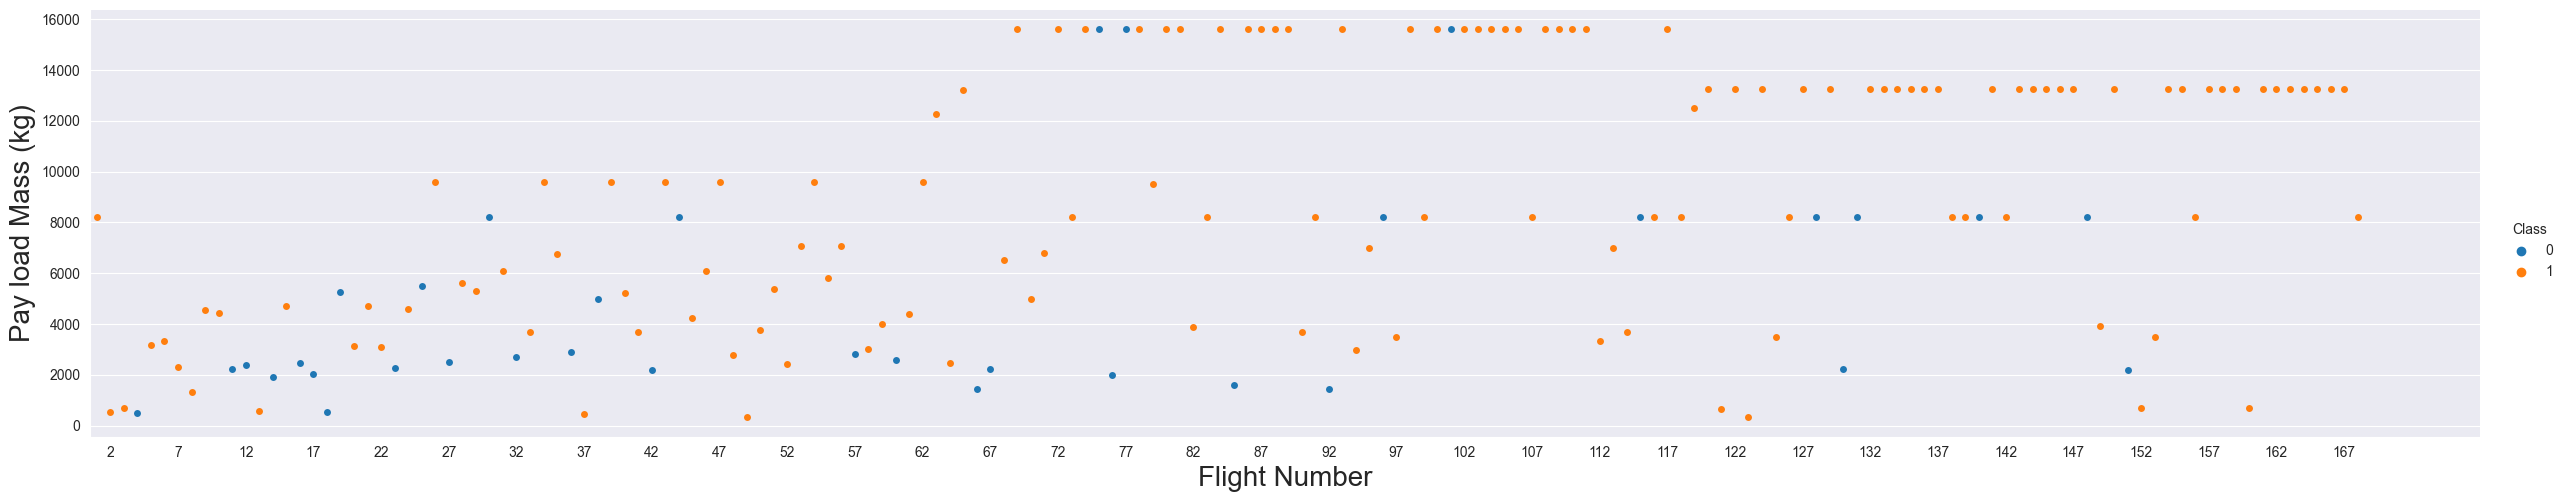

In [37]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5).set(xticks=np.arange(1, 180, 5))
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

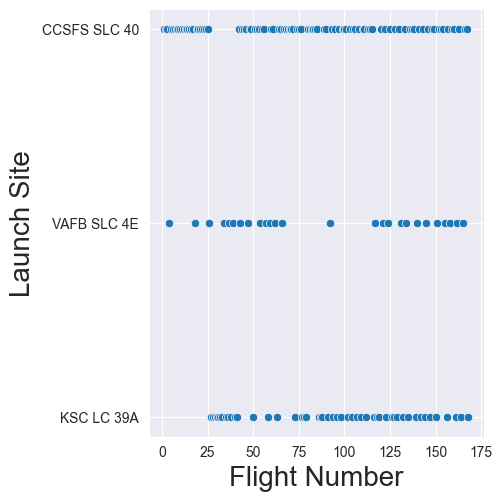

In [38]:
sns.relplot(y="LaunchSite", x="FlightNumber", data=df)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

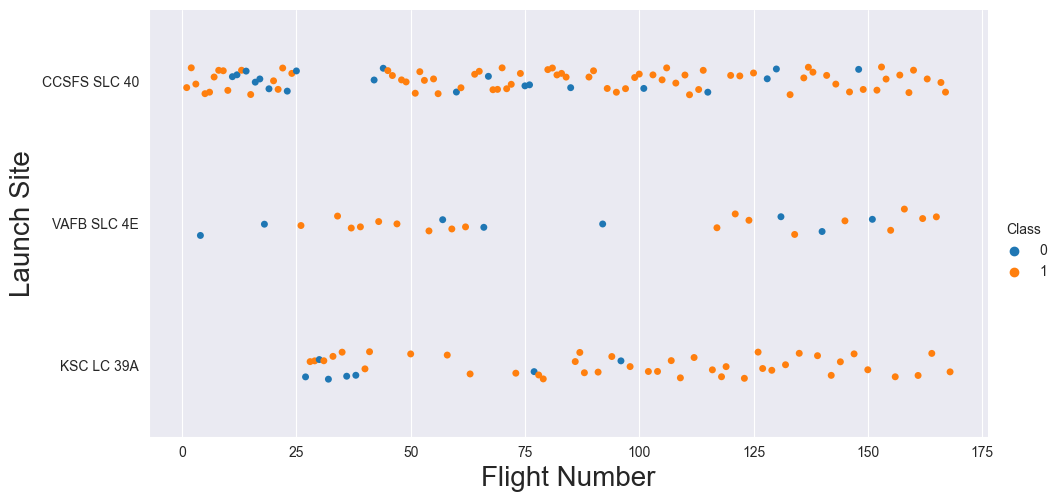

In [39]:
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df,aspect=2)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

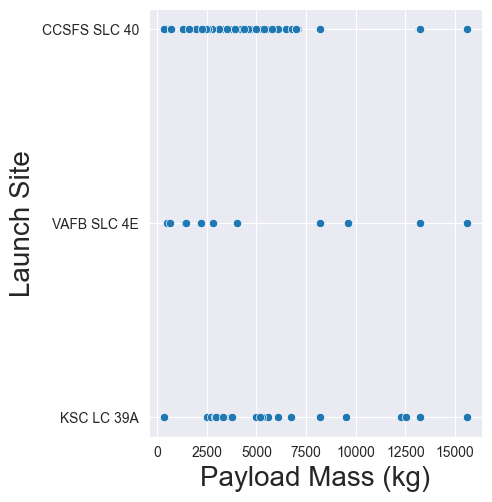

In [40]:
sns.relplot(y="LaunchSite", x="PayloadMass", data=df)
plt.xlabel("Payload Mass (kg)",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

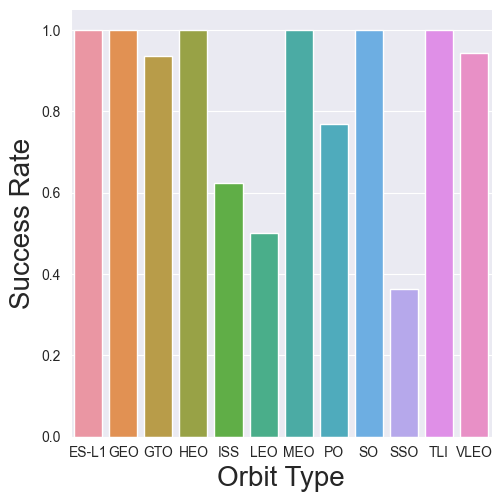

In [41]:
sns.catplot(x= 'Orbit', y = 'Class', data = df.groupby('Orbit')['Class'].mean().reset_index(), kind = 'bar')
plt.xlabel('Orbit Type',fontsize=20)
plt.ylabel('Success Rate',fontsize=20)
plt.show()

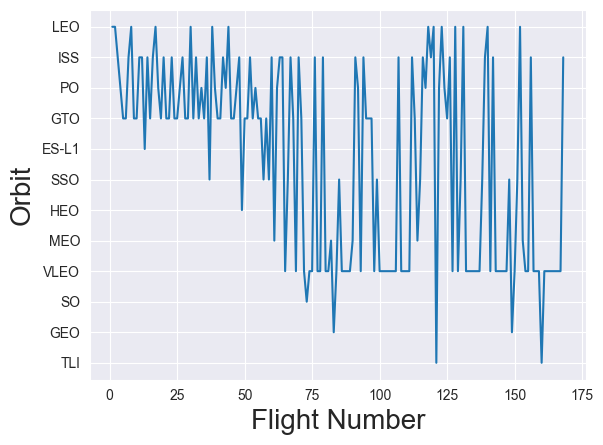

In [42]:
sns.lineplot(y="Orbit", x="FlightNumber",data=df)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

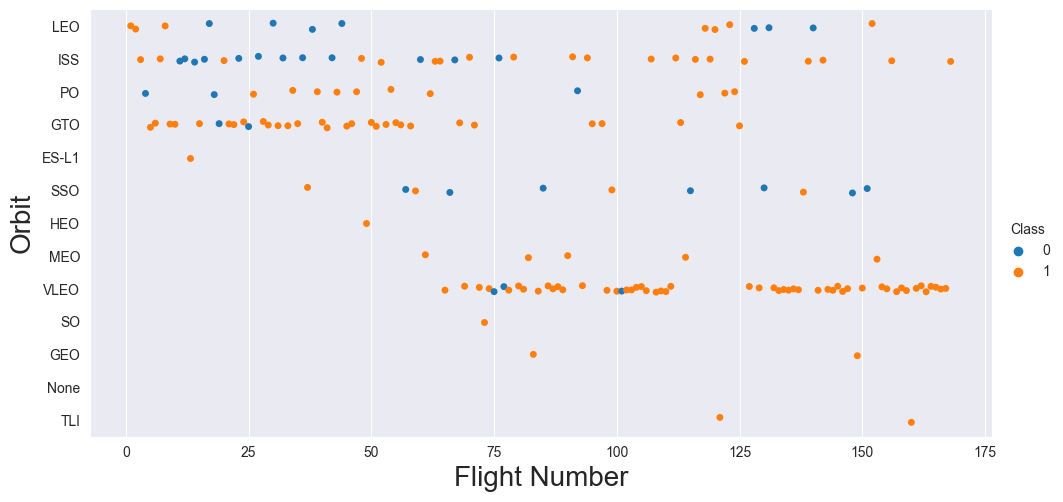

In [43]:
sns.catplot(y="Orbit", x="FlightNumber", hue="Class", data=df,aspect=2)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

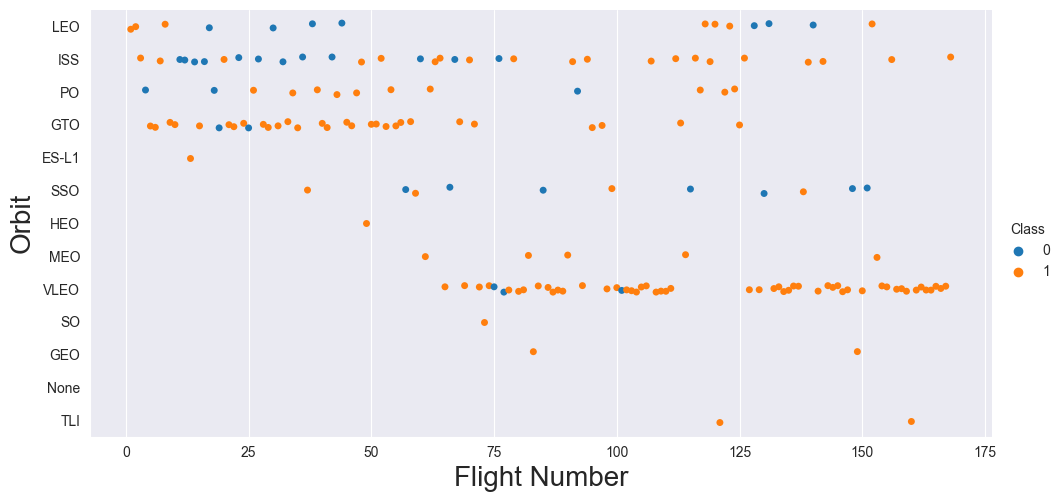

In [44]:
sns.catplot(y="Orbit", x="FlightNumber", hue="Class", data=df,aspect=2)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

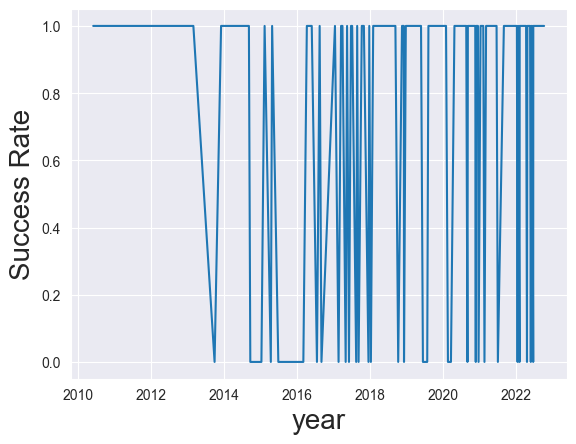

In [45]:
sns.lineplot(data=df, x="Date", y="Class") 
plt.xlabel("year",fontsize=20)
plt.ylabel("Success Rate",fontsize=20)
plt.show()

<a id="onehot"></a>
# <b><span style="color:#0266b7">Step 3.4 | </span><span style="color:#ff6200">One Hot Encoder </span></b>

In [46]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,8191.0,LEO,CCSFS SLC 40,1,False,False,False,None,1.0,0,B0003
1,2,525.0,LEO,CCSFS SLC 40,1,False,False,False,None,1.0,0,B0005
2,3,677.0,ISS,CCSFS SLC 40,1,False,False,False,None,1.0,0,B0007
3,4,500.0,PO,VAFB SLC 4E,1,False,False,False,None,1.0,0,B1003
4,5,3170.0,GTO,CCSFS SLC 40,1,False,False,False,None,1.0,0,B1004


In [47]:
features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,Orbit_TLI,Orbit_VLEO,LaunchSite_CCSFS SLC 40,LaunchSite_KSC LC 39A,LaunchSite_VAFB SLC 4E,LandingPad_5e9e3032383ecb267a34e7c7,LandingPad_5e9e3032383ecb554034e7c9,LandingPad_5e9e3032383ecb6bb234e7ca,LandingPad_5e9e3032383ecb761634e7cb,LandingPad_5e9e3033383ecb075134e7cd,LandingPad_5e9e3033383ecbb9e534e7cc,Serial_B0003,Serial_B0005,Serial_B0007,Serial_B1003,Serial_B1004,Serial_B1005,Serial_B1006,Serial_B1007,Serial_B1008,Serial_B1010,Serial_B1011,Serial_B1012,Serial_B1013,Serial_B1015,Serial_B1016,Serial_B1017,Serial_B1018,Serial_B1019,Serial_B1020,Serial_B1021,Serial_B1022,Serial_B1023,Serial_B1025,Serial_B1026,Serial_B1028,Serial_B1029,Serial_B1030,Serial_B1031,Serial_B1032,Serial_B1034,Serial_B1035,Serial_B1036,Serial_B1037,Serial_B1038,Serial_B1039,Serial_B1040,Serial_B1041,Serial_B1042,Serial_B1043,Serial_B1044,Serial_B1045,Serial_B1046,Serial_B1047,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1052,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1061,Serial_B1062,Serial_B1063,Serial_B1067,Serial_B1069,Serial_B1071,Serial_B1072,Serial_B1073,Serial_B1077
0,1,8191.0,1,False,False,False,1.0,0,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,2,525.0,1,False,False,False,1.0,0,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,3,677.0,1,False,False,False,1.0,0,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,4,500.0,1,False,False,False,1.0,0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,5,3170.0,1,False,False,False,1.0,0,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [48]:
features_one_hot.astype(float)

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,Orbit_TLI,Orbit_VLEO,LaunchSite_CCSFS SLC 40,LaunchSite_KSC LC 39A,LaunchSite_VAFB SLC 4E,LandingPad_5e9e3032383ecb267a34e7c7,LandingPad_5e9e3032383ecb554034e7c9,LandingPad_5e9e3032383ecb6bb234e7ca,LandingPad_5e9e3032383ecb761634e7cb,LandingPad_5e9e3033383ecb075134e7cd,LandingPad_5e9e3033383ecbb9e534e7cc,Serial_B0003,Serial_B0005,Serial_B0007,Serial_B1003,Serial_B1004,Serial_B1005,Serial_B1006,Serial_B1007,Serial_B1008,Serial_B1010,Serial_B1011,Serial_B1012,Serial_B1013,Serial_B1015,Serial_B1016,Serial_B1017,Serial_B1018,Serial_B1019,Serial_B1020,Serial_B1021,Serial_B1022,Serial_B1023,Serial_B1025,Serial_B1026,Serial_B1028,Serial_B1029,Serial_B1030,Serial_B1031,Serial_B1032,Serial_B1034,Serial_B1035,Serial_B1036,Serial_B1037,Serial_B1038,Serial_B1039,Serial_B1040,Serial_B1041,Serial_B1042,Serial_B1043,Serial_B1044,Serial_B1045,Serial_B1046,Serial_B1047,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1052,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1061,Serial_B1062,Serial_B1063,Serial_B1067,Serial_B1069,Serial_B1071,Serial_B1072,Serial_B1073,Serial_B1077
0,1.0,8191.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3170.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,164.0,13260.0,2.0,1.0,1.0,1.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
164,165.0,13260.0,7.0,1.0,1.0,1.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0

<a id="geomap"></a>
# <b><span style="color:#0266b7">Step 3.5 | </span><span style="color:#ff6200">Geographic Map </span></b>

In [49]:
# Import folium MarkerCluster plugin
from folium.plugins import MarkerCluster
# Import folium MousePosition plugin
from folium.plugins import MousePosition
# Import folium DivIcon plugin
from folium.features import DivIcon

In [50]:
df.columns

Index(['FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass', 'Orbit',
       'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs',
       'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Longitude', 'Latitude',
       'Class'],
      dtype='object')

In [51]:
# Select relevant sub-columns: `Launch Site`, `Lat(Latitude)`, `Long(Longitude)`, `class`
spacex_df = df[['LaunchSite', 'Latitude', 'Longitude', 'Class']]
launch_sites_df = spacex_df.groupby(['LaunchSite'], as_index=False).first()
launch_sites_df = launch_sites_df[['LaunchSite', 'Latitude', 'Longitude']]
launch_sites_df

,LaunchSite,Latitude,Longitude
0,CCSFS SLC 40,28.561857,-80.577366
1,KSC LC 39A,28.608058,-80.603956
2,VAFB SLC 4E,34.632093,-120.610829


In [52]:
# Start location is NASA Johnson Space Center
nasa_coordinate = [29.559684888503615, -95.0830971930759]
site_map = folium.Map(location=nasa_coordinate, zoom_start=10)

In [53]:
# Create a blue circle at NASA Johnson Space Center's coordinate with a popup label showing its name
circle = folium.Circle(nasa_coordinate, radius=1000, color='#d35400', fill=True).add_child(folium.Popup('NASA Johnson Space Center'))
# Create a blue circle at NASA Johnson Space Center's coordinate with a icon showing its name
marker = folium.map.Marker(
    nasa_coordinate,
    # Create an icon as a text label
    icon=DivIcon(
        icon_size=(20,20),
        icon_anchor=(0,0),
        html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % 'NASA JSC',
        )
    )
site_map.add_child(circle)
site_map.add_child(marker)

In [54]:
# Initial the map
site_map = folium.Map(location=nasa_coordinate, zoom_start=4)
# For each launch site, add a Circle object based on its coordinate (Lat, Long) values. In addition, add Launch site name as a popup label
for launch_site, site_lat, site_long in zip(launch_sites_df['LaunchSite'], launch_sites_df['Latitude'], launch_sites_df['Longitude']):
    site_coordinate = [site_lat, site_long]
    
    circle = folium.Circle(site_coordinate, radius=1000, color='#d35400', fill=True).add_child(folium.Popup(launch_site))
    
    marker = folium.map.Marker(
        site_coordinate)
    
    site_map.add_child(circle)
    site_map.add_child(marker)
site_map

In [55]:
spacex_df

,LaunchSite,Latitude,Longitude,Class
0,CCSFS SLC 40,28.561857,-80.577366,1
1,CCSFS SLC 40,28.561857,-80.577366,1
2,CCSFS SLC 40,28.561857,-80.577366,1
3,VAFB SLC 4E,34.632093,-120.610829,0
4,CCSFS SLC 40,28.561857,-80.577366,1
...,...,...,...,...
163,KSC LC 39A,28.608058,-80.603956,1
164,VAFB SLC 4E,34.632093,-120.610829,1
165,CCSFS SLC 40,28.561857,-80.577366,1
166,CCSFS SLC 40,28.561857,-80.577366,1


<a id="ml"></a>
# <p style="padding:15px;background-color:black ;margin:0;color:#ffffff;font-family:Chalkduster;font-size:75%;text-align:center;border-radius: 75px 75px;font-weight:700; box-shadow: 10px 10px 5px #32409c">Step 4 | Macine Learning 📚</p>
🔝 [Tabel of Contents](#content)

<a id="init"></a>
# <b><span style="color:#0266b7">Step 4.1 | </span><span style="color:#ff6200">Initializations </span></b>

In [56]:
# Define a function to plot Confusion Matrix
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

In [57]:
# Define X , y on DataFrame
Y = df['Class'].to_numpy()
X = features_one_hot

In [58]:
# Normalize X
transform = preprocessing.StandardScaler()
X = transform.fit(X).transform(X)

In [59]:
# Splite Data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [60]:
Y_test.shape

(34,)

<a id="lr"></a>
# <b><span style="color:#0266b7">Step 4.2 | </span><span style="color:#ff6200">LogisticRegression </span></b>

In [61]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

lr=LogisticRegression()
logreg_cv = GridSearchCV(estimator=lr, cv=10, param_grid=parameters).fit(X_train, Y_train)

In [62]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.9252747252747253


In [63]:
logreg_score = logreg_cv.score(X_test, Y_test)
print("score :", logreg_score)

score : 0.8823529411764706


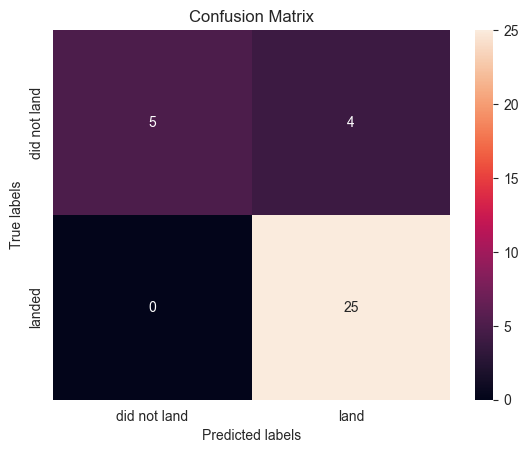

In [64]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

<a id="svc"></a>
# <b><span style="color:#0266b7">Step 4.3 | </span><span style="color:#ff6200">SVC </span></b>

In [65]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()
svm_cv = GridSearchCV(estimator=svm, cv=10, param_grid=parameters).fit(X_train, Y_train)

In [66]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.03162277660168379, 'gamma': 0.001, 'kernel': 'linear'}
accuracy : 0.9401098901098901


In [67]:
svm_cv_score = svm_cv.score(X_test, Y_test)
print("score :",svm_cv_score)

score : 0.9411764705882353


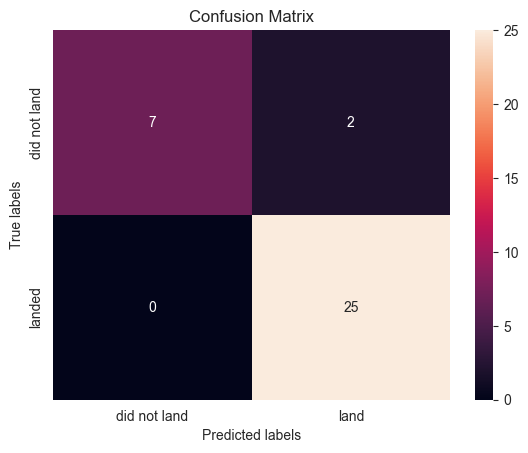

In [68]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

<a id="tree"></a>
# <b><span style="color:#0266b7">Step 4.4 | </span><span style="color:#ff6200">DecisionTreeClassifier </span></b>

In [69]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

tree_cv = GridSearchCV(estimator=tree, cv=10, param_grid=parameters).fit(X_train, Y_train)

In [70]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
accuracy : 0.9252747252747253


In [71]:
tree_cv_score = svm_cv.score(X_test, Y_test)
print("score :",tree_cv_score)

score : 0.9411764705882353


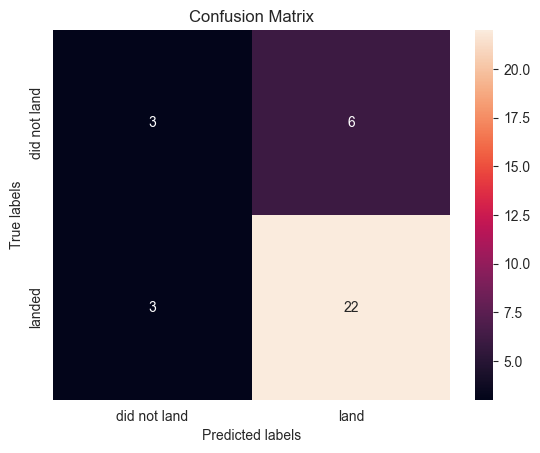

In [72]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

<a id="knn"></a>
# <b><span style="color:#0266b7">Step 4.5 | </span><span style="color:#ff6200">KNeighborsClassifier </span></b>

In [73]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

knn_cv = GridSearchCV(estimator=KNN, cv=10, param_grid=parameters).fit(X_train, Y_train)

print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 4, 'p': 1}
accuracy : 0.90989010989011


In [74]:
knn_cv_score = knn_cv.score(X_test, Y_test)
print("score :",knn_cv_score)

score : 0.9117647058823529


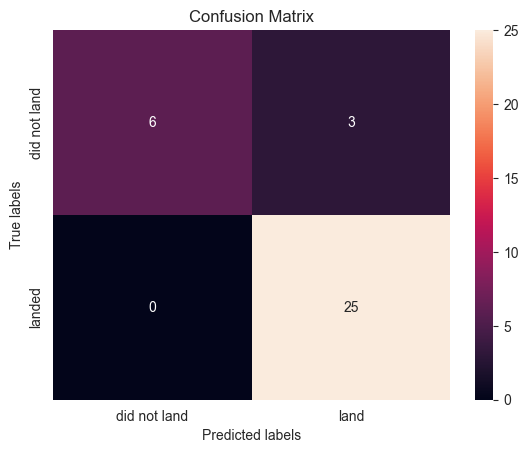

In [75]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

<a id="result"></a>
# <b><span style="color:#0266b7">Step 4.6 | </span><span style="color:#ff6200">Result </span></b>

In [76]:
accuracy = [svm_cv_score, logreg_score, knn_cv_score, tree_cv_score]
accuracy = [i * 100 for i in accuracy]

method = ['Support Vector Machine', 'Logistic Regression', 'K Nearest Neighbour', 'Decision Tree']
models = {'ML Method':method, 'Accuracy Score (%)':accuracy}

ML_df = pd.DataFrame(models)
ML_df

,ML Method,Accuracy Score (%)
0,Support Vector Machine,94.117647
1,Logistic Regression,88.235294
2,K Nearest Neighbour,91.176471
3,Decision Tree,94.117647


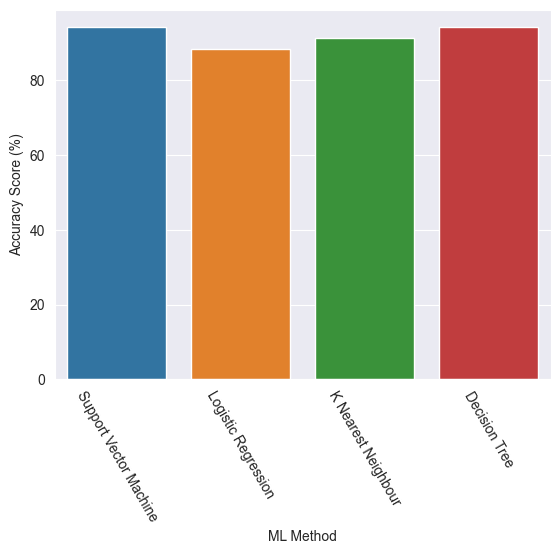

In [77]:
sns.barplot(x=ML_df['ML Method'], y=ML_df['Accuracy Score (%)'])
plt.xticks(rotation=300)
plt.show()

<a id="author"></a>
# <p style="padding:15px;background-color:black ;margin:0;color:#ffffff;font-family:Chalkduster;font-size:75%;text-align:center;border-radius: 75px 75px;font-weight:700; box-shadow: 10px 10px 5px #32409c"> Author </p>

<a id="contents_tabel"></a>    
<div style="border-radius:10px; padding: 15px; background-color: #e3e6fa; font-size:130%; text-align:left">

<h4 align="left"><span style="font-weight:700; font-size:130%"><font color=#d10202>Author:</font><font color=navy> Nima Pourmoradi</font></span></h4>
<h6 align="left"><font color=#ff6200><a href='https://github.com/NimaPourmoradi'>github: https://github.com/NimaPourmoradi</font></h6>
<h6 align="left"><font color=#ff6200><a href='https://www.kaggle.com/nimapourmoradi'>kaggle : https://www.kaggle.com/nimapourmoradi</a></font></h6>
<h6 align="left"><font color=#ff6200><a href='https://www.linkedin.com/in/nima-pourmoradi-081949288/'>linkedin : www.linkedin.com/in/nima-pourmoradi-081949288</a></font></h6>

# 🔝 [Go to Top](#content) 🔝